In [ ]:
!pythion --version

/bin/bash: line 1: pythion: command not found


In [16]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/cat.jpg')
img2 = cv2.imread('/content/gdrive/My Drive/ColabIP/lena256.jpg')

In [28]:
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
output_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [29]:
R_img1,G_img1,B_img1 = cv2.split(RGB_img1)
R_img2,G_img2,B_img2 = cv2.split(RGB_img2)

In [31]:
R_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)

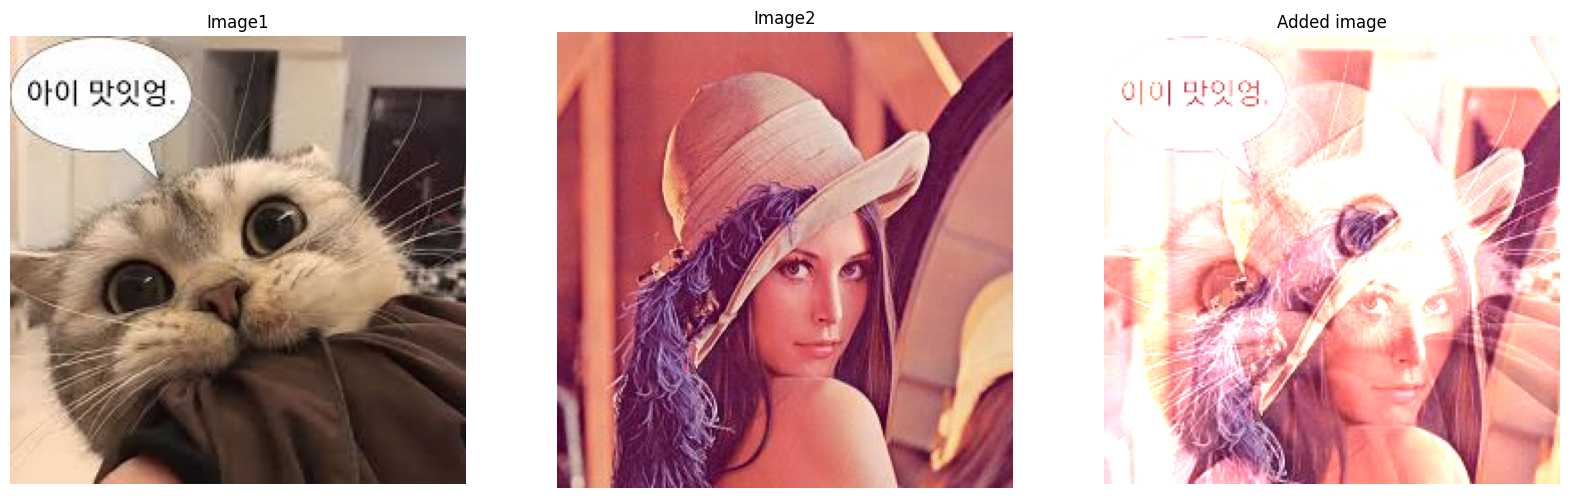

In [32]:
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    r = np.int32(R_img1[h,w]+np.int32(R_img2[h,w]))
    if(r>255):
      R_plus[h,w]= 255
    else:
      R_plus[h,w]=r
    g = np.int32(G_img1[h,w] + np.int32(G_img2[h,w]))
    if(g>255):
      G_plus[h,w]= 255
    else:
      G_plus[h,w]=g
    b = np.int32(B_img1[h,w]+np.int32(B_img2[h,w]))
    if(b>255):
      B_plus[h,w]= 255
    else:
      B_plus[h,w]=b

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Image2")
plt.imshow(RGB_img2)
plt.axis("off")
plt.subplot(1,3,3)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("Added image")
plt.imshow(output_img)
plt.axis("off")
plt.show()